# **Fase de Preparación de los Datos**

La etapa de preparación de los datos tiene como objetivo transformar los conjuntos de información obtenidos en el análisis exploratorio en una versión limpia, coherente y lista para el modelado predictivo. En esta fase se aplican técnicas de depuración, integración y transformación que aseguran la calidad y consistencia de los datos.

Durante esta fase se realizarán las siguientes acciones:
- Limpieza de datos: detección y tratamiento de valores faltantes, inconsistencias y registros duplicados.
- Tratamiento de outliers: identificación de valores extremos mediante el rango intercuartílico (IQR) y decisión sobre su corrección o eliminación.
- Codificación y normalización: conversión de variables categóricas en formato numérico y escalamiento de las variables continuas para mejorar la estabilidad del modelo.
- Balance de clases: ajuste de la distribución de la variable Class para evitar sesgos en el aprendizaje.
- Selección de características: revisión de correlaciones y reducción de colinealidad entre variables predictoras.

Estas tareas garantizan que el dataset resultante sea adecuado para aplicar técnicas de modelado supervisado, minimizando el riesgo de errores, sesgos o pérdida de información relevante.

In [91]:
# 1. Gestión de Librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [92]:
# 2. Carga del dataset desde su fuente
url = "https://github.com/aperezn298/CienciaDatosSENA/raw/refs/heads/main/04Datasets/ejemploCalificacionesExcel.xlsx"
dataset = pd.read_excel(url)

dataset.head()

,ITEM,NOMBRES,APELLIDOS,Programa,Genero,Matematicas,Español,Ciencias,Idiomas
0,1,Juan,García,Contabilidad,M,1.66,2.19,3.56,2.58
1,2,María,Pérez,Mercadeo,Femenino,3.21,2.54,1.98,3.76
2,3,Pedro,Fernández,Sistemas,Masculino,3.10,3.11,2.62,2.42
3,4,Ana,Sánchez,Administracion,F,NaN,2.50,3.66,1.93
4,5,Luis,González,Salud,Masculino,2.91,2.59,2.45,NaN


### **Seleccionar los datos relevantes:** según el estudio

In [93]:
# Seleccionar los datos relevantes, por su indice de columnas en el dataset
etl_dataset = dataset.iloc[:, 3:].copy()
etl_dataset.head()

# Opción 02. Seleccionar los datos relevantes, por su nombre de columnas en el dataset
etl_dataset = dataset[['Programa', 'Genero', 'Matematicas', 'Español', 'Ciencias', 'Idiomas']].copy()
etl_dataset.head()

,Programa,Genero,Matematicas,Español,Ciencias,Idiomas
0,Contabilidad,M,1.66,2.19,3.56,2.58
1,Mercadeo,Femenino,3.21,2.54,1.98,3.76
2,Sistemas,Masculino,3.10,3.11,2.62,2.42
3,Administracion,F,NaN,2.50,3.66,1.93
4,Salud,Masculino,2.91,2.59,2.45,NaN


### **Renombrar columnas:** Renombrar las columnas de un DataFrame de Pandas es una tarea común en el análisis de datos. A menudo, los nombres de las columnas pueden ser poco claros o difíciles de entender, o pueden contener errores.

In [94]:
#Renombrar una columna especifica del dataset
etl_dataset.rename(columns={'Español':'Espanol'}, inplace=True)
etl_dataset.head()

,Programa,Genero,Matematicas,Espanol,Ciencias,Idiomas
0,Contabilidad,M,1.66,2.19,3.56,2.58
1,Mercadeo,Femenino,3.21,2.54,1.98,3.76
2,Sistemas,Masculino,3.10,3.11,2.62,2.42
3,Administracion,F,NaN,2.50,3.66,1.93
4,Salud,Masculino,2.91,2.59,2.45,NaN


In [95]:
#Renombra todas las columnas del dataset
etl_dataset.columns = ['Programa', 'Genero', 'Matematicas', 'Espanol', 'Ciencias', 'Idiomas']
etl_dataset.head()


,Programa,Genero,Matematicas,Espanol,Ciencias,Idiomas
0,Contabilidad,M,1.66,2.19,3.56,2.58
1,Mercadeo,Femenino,3.21,2.54,1.98,3.76
2,Sistemas,Masculino,3.10,3.11,2.62,2.42
3,Administracion,F,NaN,2.50,3.66,1.93
4,Salud,Masculino,2.91,2.59,2.45,NaN


### **Limpieza de datos:** detección y tratamiento de valores faltantes, inconsistencias y registros duplicados.

In [96]:
# Detección de valores faltantes en el dataset
etl_dataset.isnull().sum()

Programa       0
Genero         2
Matematicas    2
Espanol        0
Ciencias       1
Idiomas        2
dtype: int64

In [ ]:
# Tratamiento de valores faltantes en el dataset - Opción 01: Eliminación de filas con valores faltantes

# Opción 1: Crear una copia limpia sin modificar el original
etl_dataset_cleaned = etl_dataset.dropna()

# Opción 2: Limpiar el original directamente
etl_dataset.dropna(inplace=True)

# Opción 3: Eliminar una fila específica por su índice
etl_dataset.drop(index=[3], inplace=True)

In [97]:
# Tratamiento de valores faltantes en el dataset - Opción 02: Imputación de valores faltantes
# Imputar valores numéricos con la media de la columna
etl_dataset['Matematicas'] = etl_dataset['Matematicas'].fillna(etl_dataset['Matematicas'].mean())
etl_dataset['Espanol'] = etl_dataset['Espanol'].fillna(etl_dataset['Espanol'].mean())
etl_dataset['Ciencias'] = etl_dataset['Ciencias'].fillna(etl_dataset['Ciencias'].mean())
etl_dataset['Idiomas'] = etl_dataset['Idiomas'].fillna(etl_dataset['Idiomas'].mean())

In [98]:
etl_dataset

,Programa,Genero,Matematicas,Espanol,Ciencias,Idiomas
0,Contabilidad,M,1.660,2.19,3.560000,2.580000
1,Mercadeo,Femenino,3.210,2.54,1.980000,3.760000
2,Sistemas,Masculino,3.100,3.11,2.620000,2.420000
3,Administracion,F,3.515,2.50,3.660000,1.930000
4,Salud,Masculino,2.910,2.59,2.450000,3.084444
5,Salud,NaN,3.950,1.88,2.670000,1.690000
6,Administracion,Masculino,4.200,1.69,2.360000,9.000000
7,Sistemas,Femenino,4.080,1.68,4.160000,2.940000
8,Mercadeo,Masculino,10.000,3.64,2.978947,3.280000
9,Contabilidad,Femenino,2.550,3.75,1.840000,3.170000


In [99]:
# Unificar los valores de la columna 'Genero'

# # Opcional: Convertir a minúsculas y eliminar espacios en blanco
# etl_dataset['Genero'] = etl_dataset['Genero'].str.lower().str.strip()

# Definir un diccionario de mapeo
mapping = {
    'F': 'Femenino',
    'Femenino': 'Femenino',
    'M': 'Masculino',
    'Masculino': 'Masculino',
    'Mujer': 'Femenino',
}

# Aplicar el mapeo a la columna 'Genero'
etl_dataset['Genero'] = etl_dataset['Genero'].map(mapping)
etl_dataset

,Programa,Genero,Matematicas,Espanol,Ciencias,Idiomas
0,Contabilidad,Masculino,1.660,2.19,3.560000,2.580000
1,Mercadeo,Femenino,3.210,2.54,1.980000,3.760000
2,Sistemas,Masculino,3.100,3.11,2.620000,2.420000
3,Administracion,Femenino,3.515,2.50,3.660000,1.930000
4,Salud,Masculino,2.910,2.59,2.450000,3.084444
5,Salud,NaN,3.950,1.88,2.670000,1.690000
6,Administracion,Masculino,4.200,1.69,2.360000,9.000000
7,Sistemas,Femenino,4.080,1.68,4.160000,2.940000
8,Mercadeo,Masculino,10.000,3.64,2.978947,3.280000
9,Contabilidad,Femenino,2.550,3.75,1.840000,3.170000


In [100]:
# Imputar valores categóricos con la moda de la columna
etl_dataset['Genero'] = etl_dataset['Genero'].fillna(etl_dataset['Genero'].mode()[0])

In [101]:
etl_dataset

,Programa,Genero,Matematicas,Espanol,Ciencias,Idiomas
0,Contabilidad,Masculino,1.660,2.19,3.560000,2.580000
1,Mercadeo,Femenino,3.210,2.54,1.980000,3.760000
2,Sistemas,Masculino,3.100,3.11,2.620000,2.420000
3,Administracion,Femenino,3.515,2.50,3.660000,1.930000
4,Salud,Masculino,2.910,2.59,2.450000,3.084444
5,Salud,Femenino,3.950,1.88,2.670000,1.690000
6,Administracion,Masculino,4.200,1.69,2.360000,9.000000
7,Sistemas,Femenino,4.080,1.68,4.160000,2.940000
8,Mercadeo,Masculino,10.000,3.64,2.978947,3.280000
9,Contabilidad,Femenino,2.550,3.75,1.840000,3.170000


### **Tratamiento de outliers:** identificación de valores extremos mediante el rango intercuartílico (IQR) y decisión sobre su corrección o eliminación.

In [102]:
# Identificación de valores extremos mediante el rango intercuartílico (IQR)

columns = etl_dataset.select_dtypes(include=[np.number]).columns.tolist()

for col in columns:
    Q1 = etl_dataset[col].quantile(0.25)
    Q3 = etl_dataset[col].quantile(0.75)
    IQR = Q3 - Q1

    # Definir límites para la detección de outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Identificar outliers
    outliers = etl_dataset[(etl_dataset[col] < limite_inferior) | (etl_dataset[col] > limite_superior)]
    print(f"Outliers en la columna {col}:")
    print(outliers)
    print("\n")

Outliers en la columna Matematicas:
   Programa     Genero  Matematicas  Espanol  Ciencias  Idiomas
8  Mercadeo  Masculino         10.0     3.64  2.978947     3.28


Outliers en la columna Espanol:
    Programa     Genero  Matematicas  Espanol  Ciencias  Idiomas
19  Sistemas  Masculino         4.05      8.0       3.7      4.0


Outliers en la columna Ciencias:
Empty DataFrame
Columns: [Programa, Genero, Matematicas, Espanol, Ciencias, Idiomas]
Index: []


Outliers en la columna Idiomas:
         Programa     Genero  Matematicas  Espanol  Ciencias  Idiomas
6  Administracion  Masculino          4.2     1.69      2.36      9.0




In [103]:
# Imputación de valores extremos mediante la media de la columna
columns = etl_dataset.select_dtypes(include=[np.number]).columns.tolist()

for col in columns:
    Q1 = etl_dataset[col].quantile(0.25)
    Q3 = etl_dataset[col].quantile(0.75)
    IQR = Q3 - Q1

    # Definir límites para la detección de outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Identificar outliers
    outliers = etl_dataset[(etl_dataset[col] < limite_inferior) | (etl_dataset[col] > limite_superior)]

    # Reemplazar outliers con la media de la columna
    mean_value = etl_dataset[col].mean()
    etl_dataset.loc[(etl_dataset[col] < limite_inferior) | (etl_dataset[col] > limite_superior), col] = mean_value

# Mostrar el dataset después del tratamiento de outliers   
etl_dataset

,Programa,Genero,Matematicas,Espanol,Ciencias,Idiomas
0,Contabilidad,Masculino,1.660,2.1900,3.560000,2.580000
1,Mercadeo,Femenino,3.210,2.5400,1.980000,3.760000
2,Sistemas,Masculino,3.100,3.1100,2.620000,2.420000
3,Administracion,Femenino,3.515,2.5000,3.660000,1.930000
4,Salud,Masculino,2.910,2.5900,2.450000,3.084444
5,Salud,Femenino,3.950,1.8800,2.670000,1.690000
6,Administracion,Masculino,4.200,1.6900,2.360000,3.084444
7,Sistemas,Femenino,4.080,1.6800,4.160000,2.940000
8,Mercadeo,Masculino,3.515,3.6400,2.978947,3.280000
9,Contabilidad,Femenino,2.550,3.7500,1.840000,3.170000


### **Codificación y normalización:** conversión de variables categóricas en formato numérico y escalamiento de las variables continuas para mejorar la estabilidad del modelo.

In [104]:
# Conversión de variables categóricas en formato numérico

# Opción 1: Etiquetado manual
etl_dataset['Genero_code'] = etl_dataset['Genero'].map({'Masculino': 1, 'Femenino': 2})

# Mostrar el dataset después de la codificación 
etl_dataset

,Programa,Genero,Matematicas,Espanol,Ciencias,Idiomas,Genero_code
0,Contabilidad,Masculino,1.660,2.1900,3.560000,2.580000,1
1,Mercadeo,Femenino,3.210,2.5400,1.980000,3.760000,2
2,Sistemas,Masculino,3.100,3.1100,2.620000,2.420000,1
3,Administracion,Femenino,3.515,2.5000,3.660000,1.930000,2
4,Salud,Masculino,2.910,2.5900,2.450000,3.084444,1
5,Salud,Femenino,3.950,1.8800,2.670000,1.690000,2
6,Administracion,Masculino,4.200,1.6900,2.360000,3.084444,1
7,Sistemas,Femenino,4.080,1.6800,4.160000,2.940000,2
8,Mercadeo,Masculino,3.515,3.6400,2.978947,3.280000,1
9,Contabilidad,Femenino,2.550,3.7500,1.840000,3.170000,2


In [105]:
# Opción 2: label encoding con sklearn
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
etl_dataset['Programa_code'] = label_encoder.fit_transform(etl_dataset['Programa'])
etl_dataset

,Programa,Genero,Matematicas,Espanol,Ciencias,Idiomas,Genero_code,Programa_code
0,Contabilidad,Masculino,1.660,2.1900,3.560000,2.580000,1,1
1,Mercadeo,Femenino,3.210,2.5400,1.980000,3.760000,2,2
2,Sistemas,Masculino,3.100,3.1100,2.620000,2.420000,1,4
3,Administracion,Femenino,3.515,2.5000,3.660000,1.930000,2,0
4,Salud,Masculino,2.910,2.5900,2.450000,3.084444,1,3
5,Salud,Femenino,3.950,1.8800,2.670000,1.690000,2,3
6,Administracion,Masculino,4.200,1.6900,2.360000,3.084444,1,0
7,Sistemas,Femenino,4.080,1.6800,4.160000,2.940000,2,4
8,Mercadeo,Masculino,3.515,3.6400,2.978947,3.280000,1,2
9,Contabilidad,Femenino,2.550,3.7500,1.840000,3.170000,2,1


In [106]:
# Opción 3: Dummy encoding con pandas
etl_dataset = pd.get_dummies(etl_dataset, columns=['Programa'], drop_first=True)
etl_dataset

,Genero,Matematicas,Espanol,Ciencias,Idiomas,Genero_code,Programa_code,Programa_Contabilidad,Programa_Mercadeo,Programa_Salud,Programa_Sistemas
0,Masculino,1.660,2.1900,3.560000,2.580000,1,1,True,False,False,False
1,Femenino,3.210,2.5400,1.980000,3.760000,2,2,False,True,False,False
2,Masculino,3.100,3.1100,2.620000,2.420000,1,4,False,False,False,True
3,Femenino,3.515,2.5000,3.660000,1.930000,2,0,False,False,False,False
4,Masculino,2.910,2.5900,2.450000,3.084444,1,3,False,False,True,False
5,Femenino,3.950,1.8800,2.670000,1.690000,2,3,False,False,True,False
6,Masculino,4.200,1.6900,2.360000,3.084444,1,0,False,False,False,False
7,Femenino,4.080,1.6800,4.160000,2.940000,2,4,False,False,False,True
8,Masculino,3.515,3.6400,2.978947,3.280000,1,2,False,True,False,False
9,Femenino,2.550,3.7500,1.840000,3.170000,2,1,True,False,False,False


In [107]:
# Escalamiento de las variables continuas para mejorar la estabilidad del modelo.

# Crear una columna edad con valores aleatorios entre 18 y 60
np.random.seed(0)
etl_dataset['Edad'] = np.random.randint(18, 60, size=etl_dataset.shape[0])

etl_dataset

,Genero,Matematicas,Espanol,Ciencias,Idiomas,Genero_code,Programa_code,Programa_Contabilidad,Programa_Mercadeo,Programa_Salud,Programa_Sistemas,Edad
0,Masculino,1.660,2.1900,3.560000,2.580000,1,1,True,False,False,False,18
1,Femenino,3.210,2.5400,1.980000,3.760000,2,2,False,True,False,False,21
2,Masculino,3.100,3.1100,2.620000,2.420000,1,4,False,False,False,True,21
3,Femenino,3.515,2.5000,3.660000,1.930000,2,0,False,False,False,False,57
4,Masculino,2.910,2.5900,2.450000,3.084444,1,3,False,False,True,False,27
5,Femenino,3.950,1.8800,2.670000,1.690000,2,3,False,False,True,False,37
6,Masculino,4.200,1.6900,2.360000,3.084444,1,0,False,False,False,False,39
7,Femenino,4.080,1.6800,4.160000,2.940000,2,4,False,False,False,True,54
8,Masculino,3.515,3.6400,2.978947,3.280000,1,2,False,True,False,False,41
9,Femenino,2.550,3.7500,1.840000,3.170000,2,1,True,False,False,False,24


In [108]:
# Escalamiento de las variables continuas para mejorar la estabilidad del modelo. 
# Las variables a escalar son: 'Matematicas', 'Espanol', 'Ciencias', 'Idiomas', 'Edad'
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
etl_dataset[['Matematicas_scaler', 'Espanol_scaler', 'Ciencias_scaler', 'Idiomas_scaler', 'Edad_scaler']] = scaler.fit_transform(etl_dataset[['Matematicas', 'Espanol', 'Ciencias', 'Idiomas', 'Edad']])

etl_dataset

,Genero,Matematicas,Espanol,Ciencias,Idiomas,Genero_code,Programa_code,Programa_Contabilidad,Programa_Mercadeo,Programa_Salud,Programa_Sistemas,Edad,Matematicas_scaler,Espanol_scaler,Ciencias_scaler,Idiomas_scaler,Edad_scaler
0,Masculino,1.660,2.1900,3.560000,2.580000,1,1,True,False,False,False,18,-1.905544,-0.802812,0.703818,-0.352632,-1.529006
1,Femenino,3.210,2.5400,1.980000,3.760000,2,2,False,True,False,False,21,0.023963,-0.358902,-1.210007,1.641483,-1.298503
2,Masculino,3.100,3.1100,2.620000,2.420000,1,4,False,False,False,True,21,-0.112970,0.364038,-0.434786,-0.623020,-1.298503
3,Femenino,3.515,2.5000,3.660000,1.930000,2,0,False,False,False,False,57,0.403640,-0.409634,0.824946,-1.451084,1.467538
4,Masculino,2.910,2.5900,2.450000,3.084444,1,3,False,False,True,False,27,-0.349490,-0.295486,-0.640704,0.499843,-0.837496
5,Femenino,3.950,1.8800,2.670000,1.690000,2,3,False,False,True,False,37,0.945147,-1.195990,-0.374222,-1.856667,-0.069151
6,Masculino,4.200,1.6900,2.360000,3.084444,1,0,False,False,False,False,39,1.256358,-1.436970,-0.749720,0.499843,0.084518
7,Femenino,4.080,1.6800,4.160000,2.940000,2,4,False,False,False,True,54,1.106977,-1.449654,1.430587,0.255742,1.237035
8,Masculino,3.515,3.6400,2.978947,3.280000,1,2,False,True,False,False,41,0.403640,1.036246,0.000000,0.830318,0.238187
9,Femenino,2.550,3.7500,1.840000,3.170000,2,1,True,False,False,False,24,-0.797633,1.175761,-1.379586,0.644426,-1.067999


### **Balance de clases:** ajuste de la distribución de la variable Class para evitar sesgos en el aprendizaje.

In [110]:
# Ajuste de la distribución de la variable Class para evitar sesgos en el aprendizaje.

# Crear una columna buen o mal estudiante basada en el promedio de las calificaciones
etl_dataset['Promedio'] = etl_dataset[['Matematicas', 'Espanol', 'Ciencias', 'Idiomas']].mean(axis=1)
etl_dataset['Class'] = np.where(etl_dataset['Promedio'] >= 3, 'Buen Estudiante', 'Mal Estudiante')
etl_dataset

,Genero,Matematicas,Espanol,Ciencias,Idiomas,Genero_code,Programa_code,Programa_Contabilidad,Programa_Mercadeo,Programa_Salud,Programa_Sistemas,Edad,Matematicas_scaler,Espanol_scaler,Ciencias_scaler,Idiomas_scaler,Edad_scaler,Promedio,Class
0,Masculino,1.660,2.1900,3.560000,2.580000,1,1,True,False,False,False,18,-1.905544,-0.802812,0.703818,-0.352632,-1.529006,2.497500,Mal Estudiante
1,Femenino,3.210,2.5400,1.980000,3.760000,2,2,False,True,False,False,21,0.023963,-0.358902,-1.210007,1.641483,-1.298503,2.872500,Mal Estudiante
2,Masculino,3.100,3.1100,2.620000,2.420000,1,4,False,False,False,True,21,-0.112970,0.364038,-0.434786,-0.623020,-1.298503,2.812500,Mal Estudiante
3,Femenino,3.515,2.5000,3.660000,1.930000,2,0,False,False,False,False,57,0.403640,-0.409634,0.824946,-1.451084,1.467538,2.901250,Mal Estudiante
4,Masculino,2.910,2.5900,2.450000,3.084444,1,3,False,False,True,False,27,-0.349490,-0.295486,-0.640704,0.499843,-0.837496,2.758611,Mal Estudiante
5,Femenino,3.950,1.8800,2.670000,1.690000,2,3,False,False,True,False,37,0.945147,-1.195990,-0.374222,-1.856667,-0.069151,2.547500,Mal Estudiante
6,Masculino,4.200,1.6900,2.360000,3.084444,1,0,False,False,False,False,39,1.256358,-1.436970,-0.749720,0.499843,0.084518,2.833611,Mal Estudiante
7,Femenino,4.080,1.6800,4.160000,2.940000,2,4,False,False,False,True,54,1.106977,-1.449654,1.430587,0.255742,1.237035,3.215000,Buen Estudiante
8,Masculino,3.515,3.6400,2.978947,3.280000,1,2,False,True,False,False,41,0.403640,1.036246,0.000000,0.830318,0.238187,3.353487,Buen Estudiante
9,Femenino,2.550,3.7500,1.840000,3.170000,2,1,True,False,False,False,24,-0.797633,1.175761,-1.379586,0.644426,-1.067999,2.827500,Mal Estudiante


In [111]:
cantidad_estudiantes = etl_dataset['Class'].value_counts()
cantidad_estudiantes

Class
Mal Estudiante     15
Buen Estudiante     5
Name: count, dtype: int64

In [117]:
# Balancear las clases mediante el método SMOTE: sobremuestreo de la clase minoritaria

# Librería imbalanced-learn
from imblearn.over_sampling import SMOTE, RandomOverSampler

# Generar el SMOTE
smote = SMOTE(random_state=42)
ros = RandomOverSampler(random_state=42)

# Separar características y etiqueta
X = etl_dataset[['Matematicas', 'Espanol', 'Ciencias', 'Idiomas', 'Edad']]
y = etl_dataset['Class']

# Aplicar SMOTE
# Distribución de clases
cnt = y.value_counts()
n_min = cnt.min()

if n_min <= 1:
    X_resampled, y_resampled = smote.fit_resample(X, y)
else:
    X_resampled, y_resampled = ros.fit_resample(X, y)


# Combinar las características y la etiqueta resampleadas en un nuevo DataFrame
etl_dataset_resampled = pd.concat([X_resampled, y_resampled], axis=1)
etl_dataset_resampled['Class'].value_counts()


Class
Mal Estudiante     15
Buen Estudiante    15
Name: count, dtype: int64

In [118]:
etl_dataset_resampled

,Matematicas,Espanol,Ciencias,Idiomas,Edad,Class
0,1.660,2.1900,3.560000,2.580000,18,Mal Estudiante
1,3.210,2.5400,1.980000,3.760000,21,Mal Estudiante
2,3.100,3.1100,2.620000,2.420000,21,Mal Estudiante
3,3.515,2.5000,3.660000,1.930000,57,Mal Estudiante
4,2.910,2.5900,2.450000,3.084444,27,Mal Estudiante
5,3.950,1.8800,2.670000,1.690000,37,Mal Estudiante
6,4.200,1.6900,2.360000,3.084444,39,Mal Estudiante
7,4.080,1.6800,4.160000,2.940000,54,Buen Estudiante
8,3.515,3.6400,2.978947,3.280000,41,Buen Estudiante
9,2.550,3.7500,1.840000,3.170000,24,Mal Estudiante


### **Selección de características:** revisión de correlaciones y reducción de colinealidad entre variables predictoras.

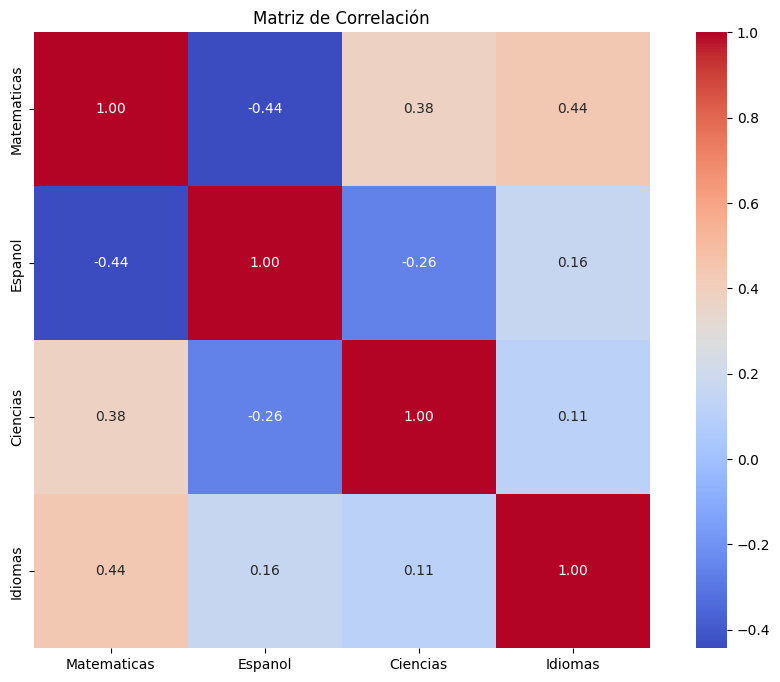

['Matematicas', 'Espanol', 'Ciencias', 'Idiomas']

In [120]:
# Revisión de correlaciones y reducción de colinealidad entre variables predictoras.

# Matriz de correlación
corr = etl_dataset_resampled.select_dtypes(include=['float64', 'int64']).corr()

# Mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Matriz de Correlación")
plt.show()
# Identificación de variables altamente correlacionadas (umbral > 0.8)
threshold = 0.8
high_corr_var = corr[corr.abs() > threshold].index.tolist()
high_corr_var

In [ ]:
# Exportar el dataset preparado a un nuevo archivo excel
etl_dataset_resampled.to_excel("etl_dataset_preparado.xlsx", index=False)